In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy
%matplotlib inline

**This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.
(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?**

In [2]:
Weekly = pd.read_csv("data/Weekly.csv").drop('Unnamed: 0',axis = 1)
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
#将Weekly哑变量便于分析
key_title = 'Direction'
dummies = pd.get_dummies(Weekly['Direction'],prefix = key_title)
Weekly_Dummy = Weekly.join(dummies)

In [4]:
Weekly_Dummy.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Down,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,1,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,1,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,0,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,0,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,0,1


In [5]:
Weekly_Dummy.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Down,Direction_Up
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.444444,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,0.000000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000,1.000000


In [6]:
attributes = ["Year","Lag1","Lag2","Lag3","Lag4","Lag5","Volume","Today","Direction_Up"]
Weekly_Dummy[attributes].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction_Up,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


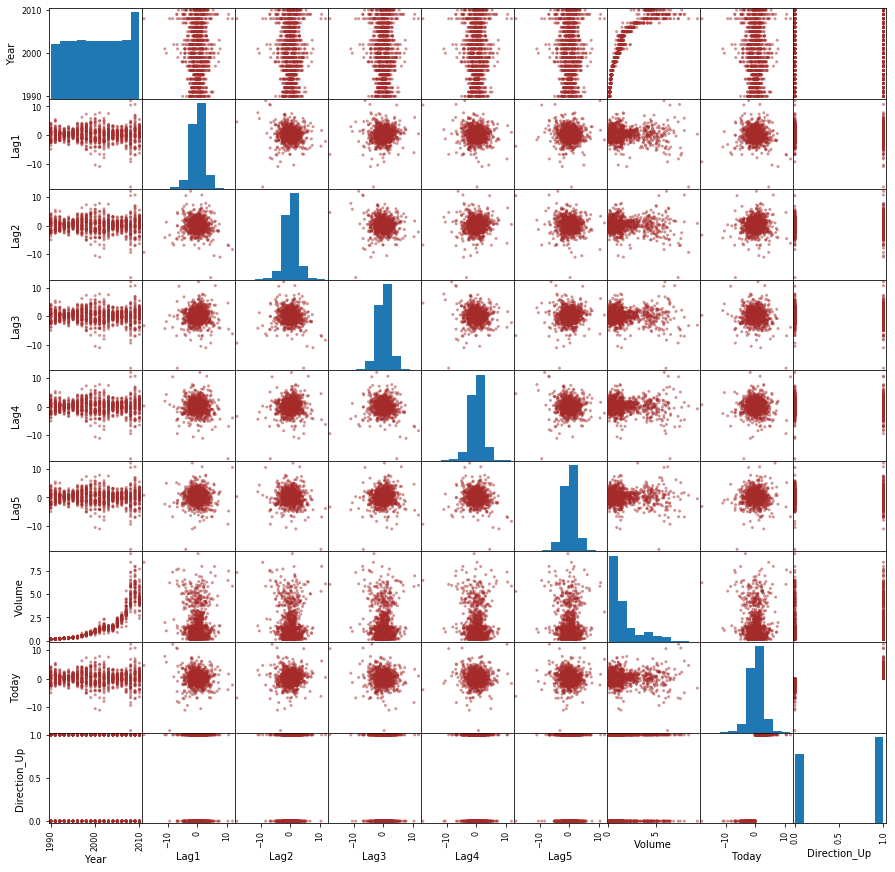

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(Weekly_Dummy[attributes], color="brown",figsize = (15,15))
plt.grid(linestyle='')

**Year and Volume appear to have a relationship. No other patterns are discernible.**

**(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?**

In [8]:
#statsmodels方案
glm_smf = smf.logit('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = Weekly_Dummy).fit()
glm_smf.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.006580
Time:                        19:27:33   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

**Lag2统计显著**

**(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.**

In [9]:
#注意与R互倒
glm_pred_table = pd.DataFrame(glm_smf.pred_table().T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table

Direction       
pred      Down     Up
Down      54.0   48.0
Up       430.0  557.0

In [10]:
(Weekly_Dummy['Direction_Up'] == (glm_smf.predict() > 0.5)).mean()

0.5610651974288338

**FN:48;FP:430**

In [11]:
print('TPR:',557/(48+557))
print('FPR/Type I error:',430/(430+54))
print('Type II error:',1 - 557/(48+557))
print('false discovery proportion:',1-557/(443+557))
print('Specificity:',1-430/(430+54))

TPR: 0.9206611570247933
FPR/Type I error: 0.8884297520661157
Type II error: 0.07933884297520666
false discovery proportion: 0.44299999999999995
Specificity: 0.11157024793388426


**(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010)**

In [12]:
Weekly_train = Weekly_Dummy[Weekly_Dummy['Year'] <= 2008]
Weekly_test = Weekly_Dummy[Weekly_Dummy['Year']  >= 2009]

In [13]:
#考虑后面使用LDA/QDA/KNN采用skleran方案
y_Direction,X_Lag2 = patsy.dmatrices('Direction_Up ~ 0 + Lag2',data = Weekly_train,return_type="dataframe")
y_Direction_test,X_Lag2_test = patsy.dmatrices('Direction_Up ~ 0 + Lag2',data = Weekly_test,return_type="dataframe")

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(X_Lag2, np.c_[y_Direction].ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_reg.score(X_Lag2_test,np.c_[y_Direction_test].ravel())

0.625

In [16]:
from sklearn.metrics import confusion_matrix
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(np.c_[y_Direction_test].ravel(), log_reg.predict(X_Lag2_test)).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table     

Direction    
pred      Down  Up
Down         9   5
Up          34  56

**(e) Repeat (d) using LDA.**

In [17]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_Lag2, np.c_[y_Direction].ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
lda.score(X_Lag2_test,np.c_[y_Direction_test].ravel())

0.625

In [19]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(np.c_[y_Direction_test].ravel(), lda.predict(X_Lag2_test)).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table    

Direction    
pred      Down  Up
Down         9   5
Up          34  56

**(e) Repeat (d) using QDA.**

In [20]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_Lag2, np.c_[y_Direction].ravel())

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [21]:
qda.score(X_Lag2_test,np.c_[y_Direction_test].ravel())

0.5865384615384616

In [22]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(np.c_[y_Direction_test].ravel(), qda.predict(X_Lag2_test)).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table    

Direction    
pred      Down  Up
Down         0   0
Up          43  61

**(g) Repeat (d) using KNN with K = 1.**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_Lag2, np.c_[y_Direction].ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
knn.score(X_Lag2_test,np.c_[y_Direction_test].ravel())

0.49038461538461536

In [25]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(np.c_[y_Direction_test].ravel(), knn.predict(X_Lag2_test)).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table    

Direction    
pred      Down  Up
Down        21  31
Up          22  30

**(h) Which of these methods appears to provide the best results on
this data?**

Logistic regression and LDA methods provide similar test error rates.

**(i) Experiment with different combinations of predictors, includ-
ing possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confu-
sion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.**

In [1]:
factors = ['Lag1','Lag2','Lag3','Lag4','Lag5', 'Volume',
          'I(Lag1**2)','I(Lag2**2)','Lag1*Lag2']
response = 'Direction_Up'
def get_models(factors,response,dic_or_list = 1,intercept = 0):
    dmatrices_models_dic = {}
    dmatrices_models_list = []
    f_len = len(factors)
    for model_len in range(f_len):
        dmatrices_models_dic[model_len] = []
        if model_len == 0:
            for factor_num in range(f_len):
                if intercept == 1:
                    dmatrices_models_dic[model_len].append(response + '~' + factors[factor_num])
                    dmatrices_models_list.append(response + '~' + factors[factor_num])
                else:
                    dmatrices_models_dic[model_len].append(response + '~ 0 +' + factors[factor_num])
                    dmatrices_models_list.append(response + '~ 0 +' + factors[factor_num])
        else:
            m_len = len(dmatrices_models_dic[model_len - 1])
            for m_num in range(m_len):
                for factor_num in range(f_len - 1,model_len - 1,-1):
                    if factors[factor_num] not in dmatrices_models_dic[model_len - 1][m_num]:
                        dmatrices_models_dic[model_len].append(dmatrices_models_dic[model_len - 1][m_num] + '+' + factors[factor_num])
                        dmatrices_models_list.append(dmatrices_models_dic[model_len - 1][m_num] + '+' + factors[factor_num])
                    else:
                        break 
    if dic_or_list == 0:
        dmatrices_models = dmatrices_models_dic
    else:
        dmatrices_models = dmatrices_models_list
    return dmatrices_models
dmatrices_models = get_models(factors,response)

In [27]:
#对logic得分的比较
score_models = {}
for dmatrices_model in dmatrices_models:
    y_Direction,X_model = patsy.dmatrices(dmatrices_model,data = Weekly_train,return_type="dataframe")
    y_Direction_test,X_model_test = patsy.dmatrices(dmatrices_model,data = Weekly_test,return_type="dataframe")
    log_reg.fit(X_model, np.c_[y_Direction].ravel())
    score_models[dmatrices_model] = log_reg.score(X_model_test,np.c_[y_Direction_test].ravel())
score_models_data = pd.DataFrame(score_models,index = ['score']).T
score_models_data.sort_values('score',ascending=False).iloc[:20]

,score
Direction_Up~ 0 +Lag2+I(Lag1**2),0.644231
Direction_Up~ 0 +Lag2+Lag4+I(Lag1**2),0.644231
Direction_Up~ 0 +Lag2+Lag3+Lag4+Lag5+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag4+Lag5+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag4+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+Lag5+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+I(Lag1**2),0.634615


In [28]:
#对lda得分的比较
score_models = {}
for dmatrices_model in dmatrices_models:
    y_Direction,X_model = patsy.dmatrices(dmatrices_model,data = Weekly_train,return_type="dataframe")
    y_Direction_test,X_model_test = patsy.dmatrices(dmatrices_model,data = Weekly_test,return_type="dataframe")
    lda.fit(X_model, np.c_[y_Direction].ravel())
    score_models[dmatrices_model] = lda.score(X_model_test,np.c_[y_Direction_test].ravel())
score_models_data = pd.DataFrame(score_models,index = ['score']).T
score_models_data.sort_values('score',ascending=False).iloc[:20]

,score
Direction_Up~ 0 +Lag2+I(Lag1**2),0.644231
Direction_Up~ 0 +Lag2+Lag4+I(Lag1**2),0.644231
Direction_Up~ 0 +Lag2+Lag5+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+Lag5+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag4+Lag5+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag4+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+Lag5+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag4+I(Lag1**2),0.634615


In [29]:
#对qda得分的比较
score_models = {}
for dmatrices_model in dmatrices_models:
    y_Direction,X_model = patsy.dmatrices(dmatrices_model,data = Weekly_train,return_type="dataframe")
    y_Direction_test,X_model_test = patsy.dmatrices(dmatrices_model,data = Weekly_test,return_type="dataframe")
    qda.fit(X_model, np.c_[y_Direction].ravel())
    score_models[dmatrices_model] = qda.score(X_model_test,np.c_[y_Direction_test].ravel())
score_models_data = pd.DataFrame(score_models,index = ['score']).T
score_models_data.sort_values('score',ascending=False).iloc[:20]

,score
Direction_Up~ 0 +Lag1+Lag2+I(Lag1**2)+I(Lag2**2),0.644231
Direction_Up~ 0 +Lag2+Lag3+I(Lag1**2)+I(Lag2**2),0.625000
Direction_Up~ 0 +Lag2+I(Lag2**2),0.625000
Direction_Up~ 0 +Lag2+Lag3+I(Lag2**2),0.625000
Direction_Up~ 0 +Lag2+I(Lag1**2)+I(Lag2**2),0.625000
Direction_Up~ 0 +Lag1+Lag2+Lag3+I(Lag1**2)+I(Lag2**2),0.615385
Direction_Up~ 0 +Lag1+Lag3,0.615385
Direction_Up~ 0 +Lag1+Lag2+Lag3+Lag4+I(Lag1**2)+I(Lag2**2),0.615385
Direction_Up~ 0 +Lag1+Lag3+I(Lag1**2)+I(Lag2**2),0.615385
Direction_Up~ 0 +Lag2+Lag3,0.605769


In [30]:
#对knn得分(K=1)的比较
score_models = {}
for dmatrices_model in dmatrices_models:
    y_Direction,X_model = patsy.dmatrices(dmatrices_model,data = Weekly_train,return_type="dataframe")
    y_Direction_test,X_model_test = patsy.dmatrices(dmatrices_model,data = Weekly_test,return_type="dataframe")
    knn.fit(X_model, np.c_[y_Direction].ravel())
    score_models[dmatrices_model] = knn.score(X_model_test,np.c_[y_Direction_test].ravel())
score_models_data = pd.DataFrame(score_models,index = ['score']).T
score_models_data.sort_values('score',ascending=False).iloc[:20]

,score
Direction_Up~ 0 +Lag2+Lag3+Lag5+I(Lag1**2),0.634615
Direction_Up~ 0 +Lag2+Lag3+Lag5+I(Lag1**2)+I(Lag2**2),0.625000
Direction_Up~ 0 +Lag1+Lag2+Lag3+Lag5+I(Lag1**2),0.625000
Direction_Up~ 0 +Lag2+Lag5+I(Lag1**2),0.605769
Direction_Up~ 0 +Lag2+Lag3+I(Lag1**2)+I(Lag2**2),0.605769
Direction_Up~ 0 +Lag1+Lag2+Lag3+I(Lag1**2)+Lag1*Lag2,0.586538
Direction_Up~ 0 +Lag1+Lag3+I(Lag1**2)+Lag1*Lag2,0.586538
Direction_Up~ 0 +Lag1+Lag2+Lag3+Lag4+Volume+I(Lag1**2)+Lag1*Lag2,0.586538
Direction_Up~ 0 +Lag3+I(Lag1**2)+Lag1*Lag2,0.586538
Direction_Up~ 0 +Lag2+Lag3+Lag4+Volume+I(Lag1**2)+Lag1*Lag2,0.586538


In [31]:
#对knn得分(K=10)的比较
score_models = {}
knn = KNeighborsClassifier(n_neighbors=10)
for dmatrices_model in dmatrices_models:
    y_Direction,X_model = patsy.dmatrices(dmatrices_model,data = Weekly_train,return_type="dataframe")
    y_Direction_test,X_model_test = patsy.dmatrices(dmatrices_model,data = Weekly_test,return_type="dataframe")
    knn.fit(X_model, np.c_[y_Direction].ravel())
    score_models[dmatrices_model] = knn.score(X_model_test,np.c_[y_Direction_test].ravel())
score_models_data = pd.DataFrame(score_models,index = ['score']).T
score_models_data.sort_values('score',ascending=False).iloc[:20]

,score
Direction_Up~ 0 +Lag3+Lag4+Volume+I(Lag1**2)+I(Lag2**2)+Lag1*Lag2,0.625000
Direction_Up~ 0 +Lag1+Lag3+Lag4+Volume+I(Lag1**2)+I(Lag2**2)+Lag1*Lag2,0.625000
Direction_Up~ 0 +Lag1+Lag2+Lag3+Lag4+Volume+I(Lag1**2)+I(Lag2**2)+Lag1*Lag2,0.625000
Direction_Up~ 0 +Lag2+Lag3+Lag4+Volume+I(Lag1**2)+I(Lag2**2)+Lag1*Lag2,0.625000
Direction_Up~ 0 +Lag1+Lag2+Lag3+I(Lag2**2),0.605769
Direction_Up~ 0 +Lag1+Lag2+Lag4+Volume+I(Lag2**2),0.605769
Direction_Up~ 0 +Lag2+Lag3+Lag4+I(Lag1**2),0.596154
Direction_Up~ 0 +Lag2+Lag3+Lag4+Volume+I(Lag2**2),0.596154
Direction_Up~ 0 +Lag1+Lag2+Lag3+Lag4+Volume,0.596154
Direction_Up~ 0 +Lag3+Lag4+I(Lag2**2),0.596154


In [32]:
#对knn得分(K=100)的比较
score_models = {}
knn = KNeighborsClassifier(n_neighbors=100)
for dmatrices_model in dmatrices_models:
    y_Direction,X_model = patsy.dmatrices(dmatrices_model,data = Weekly_train,return_type="dataframe")
    y_Direction_test,X_model_test = patsy.dmatrices(dmatrices_model,data = Weekly_test,return_type="dataframe")
    knn.fit(X_model, np.c_[y_Direction].ravel())
    score_models[dmatrices_model] = knn.score(X_model_test,np.c_[y_Direction_test].ravel())
score_models_data = pd.DataFrame(score_models,index = ['score']).T
score_models_data.sort_values('score',ascending=False).iloc[:20]

,score
Direction_Up~ 0 +Lag1+Lag3+I(Lag1**2),0.663462
Direction_Up~ 0 +Lag1+Lag2+Lag3+Volume+I(Lag1**2),0.644231
Direction_Up~ 0 +Lag1+Lag2+Lag3+Lag4+Lag5+I(Lag1**2)+I(Lag2**2),0.644231
Direction_Up~ 0 +Lag4+Volume+I(Lag1**2),0.644231
Direction_Up~ 0 +Lag1+Volume+I(Lag2**2),0.644231
Direction_Up~ 0 +Lag4+Volume+I(Lag2**2),0.644231
Direction_Up~ 0 +Lag2+Lag3+Lag4+Volume+I(Lag1**2)+I(Lag2**2),0.644231
Direction_Up~ 0 +Lag1+Lag4+I(Lag1**2)+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag1+Lag3+Lag4+Volume+I(Lag2**2),0.634615
Direction_Up~ 0 +Lag1+Lag2+Lag4+I(Lag2**2),0.634615


从以上的结果来看Direction_Up~ 0 +Lag1+Lag3+I(Lag1**2)模型下K = 100的KNN模型最好，实际这可能是过拟合的（只是训练集自己的准确率）